In [1]:
import pandas as pd
pd.set_option("display.max_columns",None)  ## To fetch all the attributes
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("priceprediction.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Compound Score
0,44419781,Studio Suite | Business Travel,348430184,Avalon,Annex,43.67127,-79.39461,Entire home/apt,155,2,34.0,1.86,8.5,308,7.5,0.670770
1,44429201,Beautiful & Cozy One Bedroom Condo In Yorkville!,354808129,Erin,Annex,43.67142,-79.39487,Entire home/apt,120,30,3.0,0.17,7.0,35,2.0,0.910667
2,44429908,Stylish Roncesvalles Private Suite w/ Tech Extras,37415518,Anthony,Roncesvalles,43.64055,-79.43939,Entire home/apt,95,3,37.0,2.47,1.0,117,7.5,0.907546
3,44430872,Newly Renovated 2nd floor Suite,358865808,Joe,Weston-Pellam Park,43.66801,-79.45752,Entire home/apt,115,3,4.0,1.08,1.0,79,4.0,0.878850
4,44434249,Zahid's Castle for four guests,358919585,Zahid,Cliffcrest,43.71878,-79.25161,Entire home/apt,60,2,19.0,0.94,1.0,0,6.0,0.856045


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11720 non-null  int64  
 1   name                            11720 non-null  object 
 2   host_id                         11720 non-null  int64  
 3   host_name                       11720 non-null  object 
 4   neighbourhood                   11720 non-null  object 
 5   latitude                        11720 non-null  float64
 6   longitude                       11720 non-null  float64
 7   room_type                       11720 non-null  object 
 8   price                           11720 non-null  int64  
 9   minimum_nights                  11720 non-null  int64  
 10  number_of_reviews               11720 non-null  float64
 11  reviews_per_month               11720 non-null  float64
 12  calculated_host_listings_count  

In [5]:
df['Sentiment']=''
for i in range(0,len(df['Compound Score'])):
    if df['Compound Score'].loc[i]>0:
        df['Sentiment'].loc[i]='Positive'
    elif df['Compound Score'].loc[i]== 0:
        df['Sentiment'].loc[i]='Neutral'
    else:
        df['Sentiment'].loc[i]='Negative'


In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Compound Score,Sentiment
0,44419781,Studio Suite | Business Travel,348430184,Avalon,Annex,43.67127,-79.39461,Entire home/apt,155,2,34.0,1.86,8.5,308,7.5,0.670770,Positive
1,44429201,Beautiful & Cozy One Bedroom Condo In Yorkville!,354808129,Erin,Annex,43.67142,-79.39487,Entire home/apt,120,30,3.0,0.17,7.0,35,2.0,0.910667,Positive
2,44429908,Stylish Roncesvalles Private Suite w/ Tech Extras,37415518,Anthony,Roncesvalles,43.64055,-79.43939,Entire home/apt,95,3,37.0,2.47,1.0,117,7.5,0.907546,Positive
3,44430872,Newly Renovated 2nd floor Suite,358865808,Joe,Weston-Pellam Park,43.66801,-79.45752,Entire home/apt,115,3,4.0,1.08,1.0,79,4.0,0.878850,Positive
4,44434249,Zahid's Castle for four guests,358919585,Zahid,Cliffcrest,43.71878,-79.25161,Entire home/apt,60,2,19.0,0.94,1.0,0,6.0,0.856045,Positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11720 non-null  int64  
 1   name                            11720 non-null  object 
 2   host_id                         11720 non-null  int64  
 3   host_name                       11720 non-null  object 
 4   neighbourhood                   11720 non-null  object 
 5   latitude                        11720 non-null  float64
 6   longitude                       11720 non-null  float64
 7   room_type                       11720 non-null  object 
 8   price                           11720 non-null  int64  
 9   minimum_nights                  11720 non-null  int64  
 10  number_of_reviews               11720 non-null  float64
 11  reviews_per_month               11720 non-null  float64
 12  calculated_host_listings_count  

In [8]:
df.neighbourhood=df.neighbourhood.astype("category")
df.room_type=df.room_type.astype("category")
df.Sentiment=df.Sentiment.astype("category")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              11720 non-null  int64   
 1   name                            11720 non-null  object  
 2   host_id                         11720 non-null  int64   
 3   host_name                       11720 non-null  object  
 4   neighbourhood                   11720 non-null  category
 5   latitude                        11720 non-null  float64 
 6   longitude                       11720 non-null  float64 
 7   room_type                       11720 non-null  category
 8   price                           11720 non-null  int64   
 9   minimum_nights                  11720 non-null  int64   
 10  number_of_reviews               11720 non-null  float64 
 11  reviews_per_month               11720 non-null  float64 
 12  calculated_host_li

In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'Compound Score', 'Sentiment'],
      dtype='object')

In [11]:
subset = ['neighbourhood', 'latitude','longitude', 'room_type', 'price','minimum_nights',
       'number_of_reviews', 'reviews_per_month','availability_365','number_of_reviews_ltm', 'Sentiment']

In [12]:
df1 = df[subset]

In [13]:
df1

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,Sentiment
0,Annex,43.67127,-79.39461,Entire home/apt,155,2,34.0,1.86,308,7.5,Positive
1,Annex,43.67142,-79.39487,Entire home/apt,120,30,3.0,0.17,35,2.0,Positive
2,Roncesvalles,43.64055,-79.43939,Entire home/apt,95,3,37.0,2.47,117,7.5,Positive
3,Weston-Pellam Park,43.66801,-79.45752,Entire home/apt,115,3,4.0,1.08,79,4.0,Positive
4,Cliffcrest,43.71878,-79.25161,Entire home/apt,60,2,19.0,0.94,0,6.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...
11715,Newtonbrook East,43.80212,-79.41959,Entire home/apt,139,3,3.0,0.77,26,3.0,Positive
11716,Eringate-Centennial-West Deane,43.64060,-79.58952,Entire home/apt,115,3,1.0,0.27,156,1.0,Positive
11717,West Humber-Clairville,43.69489,-79.60727,Private room,80,1,11.0,2.47,17,7.5,Positive
11718,West Humber-Clairville,43.69492,-79.60864,Private room,64,1,12.0,2.47,20,7.5,Positive


<AxesSubplot:title={'center':'correlation of variables with price'}>

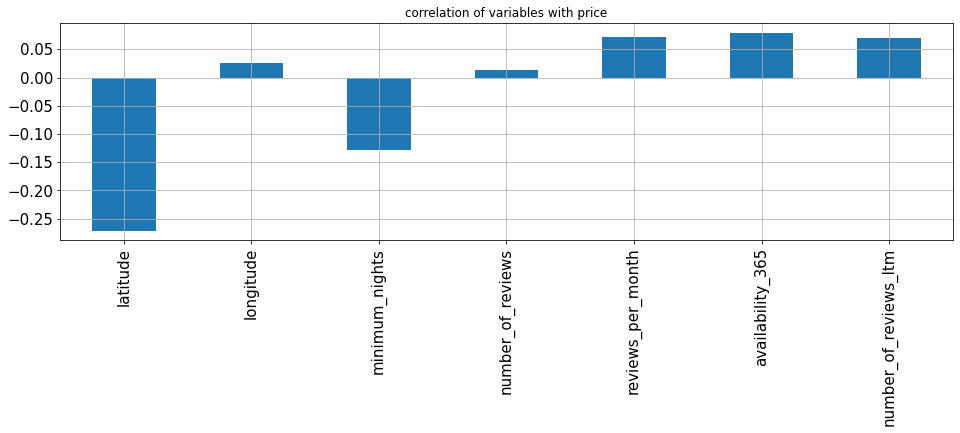

In [14]:
X = df1.drop(['price'], axis=1)
y = df1['price']

X.corrwith(y).plot.bar(figsize=(16,4),title='correlation of variables with price',fontsize=15,rot=90,grid=True)

In [15]:
#sns.pairplot(df1,hue='price')

## Label Encoding

In [16]:
SentimentDict = dict(enumerate(df1['Sentiment'].cat.categories))
print(SentimentDict)
Room_TypeDict = dict(enumerate(df1['room_type'].cat.categories))
print(Room_TypeDict)
NeighbourhoodDict = dict(enumerate(df1['neighbourhood'].cat.categories))
print(NeighbourhoodDict)

{0: 'Negative', 1: 'Neutral', 2: 'Positive'}
{0: 'Entire home/apt', 1: 'Hotel room', 2: 'Private room', 3: 'Shared room'}
{0: 'Agincourt North', 1: 'Agincourt South-Malvern West', 2: 'Alderwood', 3: 'Annex', 4: 'Banbury-Don Mills', 5: 'Bathurst Manor', 6: 'Bay Street Corridor', 7: 'Bayview Village', 8: 'Bayview Woods-Steeles', 9: 'Bedford Park-Nortown', 10: 'Beechborough-Greenbrook', 11: 'Bendale', 12: 'Birchcliffe-Cliffside', 13: 'Black Creek', 14: 'Blake-Jones', 15: 'Briar Hill-Belgravia', 16: 'Bridle Path-Sunnybrook-York Mills', 17: 'Broadview North', 18: 'Brookhaven-Amesbury', 19: 'Cabbagetown-South St.James Town', 20: 'Caledonia-Fairbank', 21: 'Casa Loma', 22: 'Centennial Scarborough', 23: 'Church-Yonge Corridor', 24: 'Clairlea-Birchmount', 25: 'Clanton Park', 26: 'Cliffcrest', 27: 'Corso Italia-Davenport', 28: 'Danforth', 29: 'Danforth East York', 30: 'Don Valley Village', 31: 'Dorset Park', 32: 'Dovercourt-Wallace Emerson-Junction', 33: 'Downsview-Roding-CFB', 34: 'Dufferin Grov

In [17]:
df1['neighbourhood']=df1['neighbourhood'].cat.codes
df1['room_type']=df1['room_type'].cat.codes
df1['Sentiment']=df1['Sentiment'].cat.codes

In [18]:
df1.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,Sentiment
0,3,43.67127,-79.39461,0,155,2,34.0,1.86,308,7.5,2
1,3,43.67142,-79.39487,0,120,30,3.0,0.17,35,2.0,2
2,103,43.64055,-79.43939,0,95,3,37.0,2.47,117,7.5,2
3,126,43.66801,-79.45752,0,115,3,4.0,1.08,79,4.0,2
4,26,43.71878,-79.25161,0,60,2,19.0,0.94,0,6.0,2


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   neighbourhood          11720 non-null  int16  
 1   latitude               11720 non-null  float64
 2   longitude              11720 non-null  float64
 3   room_type              11720 non-null  int8   
 4   price                  11720 non-null  int64  
 5   minimum_nights         11720 non-null  int64  
 6   number_of_reviews      11720 non-null  float64
 7   reviews_per_month      11720 non-null  float64
 8   availability_365       11720 non-null  int64  
 9   number_of_reviews_ltm  11720 non-null  float64
 10  Sentiment              11720 non-null  int8   
dtypes: float64(5), int16(1), int64(3), int8(2)
memory usage: 778.4 KB


In [20]:
X_new=df1.drop(['price'],axis=1)
y_new=df1['price']

## Data Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()
scaler_df=pd.DataFrame(scaler.fit_transform(X_new),columns=X_new.columns)
scaler_df

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,Sentiment
0,0.021739,0.329537,0.459464,0.000000,0.015873,0.528,0.752033,0.843836,1.000000,1.0
1,0.021739,0.330120,0.458958,0.000000,0.460317,0.032,0.065041,0.095890,0.266667,1.0
2,0.746377,0.210129,0.372216,0.000000,0.031746,0.576,1.000000,0.320548,1.000000,1.0
3,0.913043,0.316866,0.336892,0.000000,0.031746,0.048,0.434959,0.216438,0.533333,1.0
4,0.188406,0.514207,0.738081,0.000000,0.015873,0.288,0.378049,0.000000,0.800000,1.0
...,...,...,...,...,...,...,...,...,...,...
11715,0.615942,0.838147,0.410794,0.000000,0.031746,0.032,0.308943,0.071233,0.400000,1.0
11716,0.289855,0.210324,0.079708,0.000000,0.031746,0.000,0.105691,0.427397,0.133333,1.0
11717,0.891304,0.421347,0.045124,0.666667,0.000000,0.160,1.000000,0.046575,1.000000,1.0
11718,0.891304,0.421464,0.042455,0.666667,0.000000,0.176,1.000000,0.054795,1.000000,1.0


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(scaler_df,y_new)

In [25]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(scaler_df.columns)

In [26]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']

In [27]:
featureScores

,Specs,Score
0,neighbourhood,96.391658
1,latitude,168.947358
2,longitude,11.254096
3,room_type,2486.589178
4,minimum_nights,140.109809
5,number_of_reviews,299.596790
6,reviews_per_month,402.616414
7,availability_365,212.065452
8,number_of_reviews_ltm,482.410070
9,Sentiment,5.492908


## Modelling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [29]:
train_input,test_input,train_output,test_output = train_test_split(scaler_df, y_new,test_size=0.20, random_state=3)

# Linear Regression

In [30]:
reg = linear_model.LinearRegression()
reg.fit(train_input,train_output)
output_ln=reg.predict(test_input)
outputln_train=reg.predict(train_input)
rmse_ln = mean_squared_error(test_output,output_ln,squared=False)   ##squared=False will calculate the RMSE, true calculate MSE
rmse_ln

65.54149366283829

In [31]:
output_ln

array([ 62.67787924, 181.44826069, 157.06747382, ..., 165.23542514,
       170.22339223, 186.32507218])

In [32]:
test_output

10867     49
9660     111
2499     185
7566      75
5160     109
        ... 
10018     44
4322      48
6129     319
10526    100
11095    119
Name: price, Length: 2344, dtype: int64

In [54]:
importance = reg.coef_
importance

array([  16.80138027,  -76.30844495,   46.16088382, -112.89827295,
        -76.03695186,  -13.69476171,   -1.08837701,   31.24791087,
        -18.5535672 ,    2.51733106])

Feature: 0, Score: 16.80138
Feature: 1, Score: -76.30844
Feature: 2, Score: 46.16088
Feature: 3, Score: -112.89827
Feature: 4, Score: -76.03695
Feature: 5, Score: -13.69476
Feature: 6, Score: -1.08838
Feature: 7, Score: 31.24791
Feature: 8, Score: -18.55357
Feature: 9, Score: 2.51733


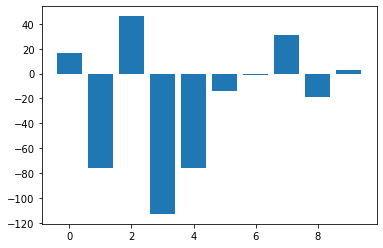

In [57]:
# summarize feature importance

for i,v in enumerate(importance):

    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)

plt.show()

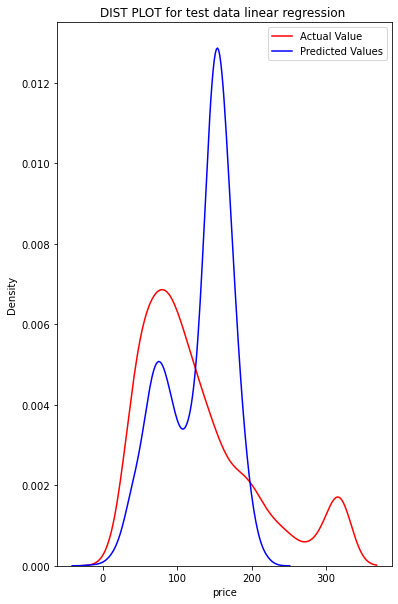

In [33]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(test_output, hist=False, color="r", label="Actual Value")
sns.distplot(output_ln, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('DIST PLOT for test data linear regression ')
plt.legend()
plt.show()



# KNN Regressor

In [35]:
knn = KNeighborsRegressor()
knn.fit(train_input,train_output)
outputknn=knn.predict(test_input)
rmse_knn = mean_squared_error(test_output,outputknn,squared=False)
rmse_knn


69.36827623229709

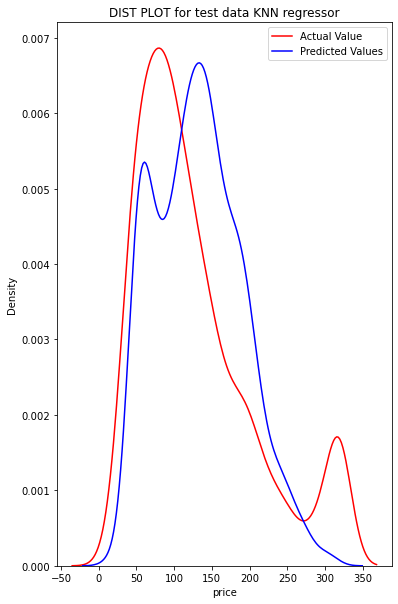

In [61]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(test_output, hist=False, color="r", label="Actual Value")
sns.distplot(outputknn, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('DIST PLOT for test data KNN regressor')
plt.legend()
plt.show()



# Decision Tree Regressor

In [36]:
DT = DecisionTreeRegressor()
DT.fit(train_input,train_output)
outputDT=DT.predict(test_input)
outputDT_train=DT.predict(train_input)


rmse_DT = mean_squared_error(test_output,outputDT,squared=False)
rmse_DT

85.03954611079703

In [37]:
outputDT

array([ 30., 174., 119., ..., 127.,  63., 100.])

Feature: 0, Score: 0.04864
Feature: 1, Score: 0.17355
Feature: 2, Score: 0.16235
Feature: 3, Score: 0.22321
Feature: 4, Score: 0.06447
Feature: 5, Score: 0.07579
Feature: 6, Score: 0.10006
Feature: 7, Score: 0.12070
Feature: 8, Score: 0.02747
Feature: 9, Score: 0.00376


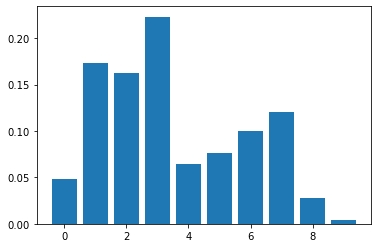

In [64]:
importance1 = DT.feature_importances_

# summarize feature importance

for i,v in enumerate(importance1):

    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance1))], importance1)

plt.show()

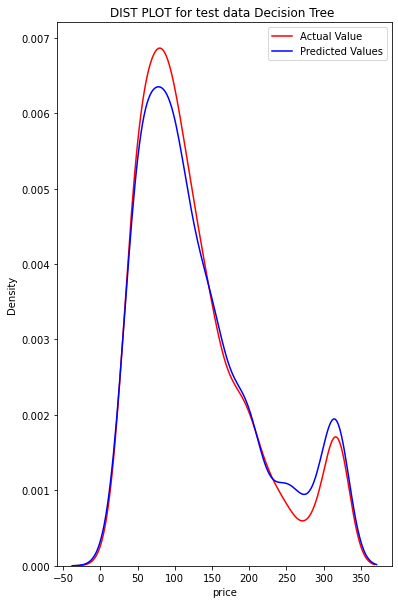

In [38]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(test_output, hist=False, color="r", label="Actual Value")
sns.distplot(outputDT, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('DIST PLOT for test data Decision Tree ')
plt.legend()
plt.show()


# Random Forest Regressor

In [40]:
RF = RandomForestRegressor()
RF.fit(train_input,train_output)
outputRF=RF.predict(test_input)
outputRF_train=RF.predict(train_input)

rmse_RF = mean_squared_error(test_output,outputRF,squared=False)
rmse_RF

61.57555922972949

In [41]:
outputRF

array([ 42.73, 188.95, 129.26, ..., 158.73, 132.87, 157.77])

Feature: 0, Score: 0.05615
Feature: 1, Score: 0.16740
Feature: 2, Score: 0.16936
Feature: 3, Score: 0.22299
Feature: 4, Score: 0.06479
Feature: 5, Score: 0.06852
Feature: 6, Score: 0.09952
Feature: 7, Score: 0.12047
Feature: 8, Score: 0.02744
Feature: 9, Score: 0.00335


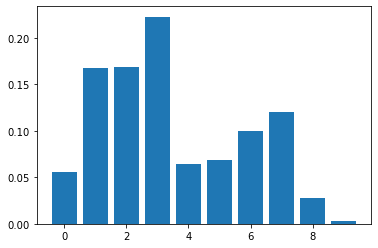

In [66]:
importance2 = RF.feature_importances_

# summarize feature importance

for i,v in enumerate(importance2):

    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance2))], importance2)

plt.show()

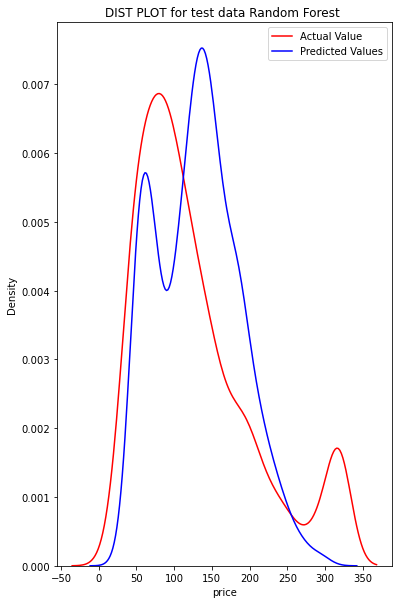

In [42]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(test_output, hist=False, color="r", label="Actual Value")
sns.distplot(outputRF, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('DIST PLOT for test data Random Forest ')
plt.legend()
plt.show()


In [79]:
X_new1=df1.drop(['Sentiment','price'],axis=1)
y_new1=df1['price']

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler=MinMaxScaler()
scaler_df1=pd.DataFrame(scaler.fit_transform(X_new1),columns=X_new1.columns)
scaler_df1

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
0,0.021739,0.329537,0.459464,0.000000,0.015873,0.528,0.752033,0.843836,1.000000
1,0.021739,0.330120,0.458958,0.000000,0.460317,0.032,0.065041,0.095890,0.266667
2,0.746377,0.210129,0.372216,0.000000,0.031746,0.576,1.000000,0.320548,1.000000
3,0.913043,0.316866,0.336892,0.000000,0.031746,0.048,0.434959,0.216438,0.533333
4,0.188406,0.514207,0.738081,0.000000,0.015873,0.288,0.378049,0.000000,0.800000
...,...,...,...,...,...,...,...,...,...
11715,0.615942,0.838147,0.410794,0.000000,0.031746,0.032,0.308943,0.071233,0.400000
11716,0.289855,0.210324,0.079708,0.000000,0.031746,0.000,0.105691,0.427397,0.133333
11717,0.891304,0.421347,0.045124,0.666667,0.000000,0.160,1.000000,0.046575,1.000000
11718,0.891304,0.421464,0.042455,0.666667,0.000000,0.176,1.000000,0.054795,1.000000


In [82]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [83]:
train_input,test_input,train_output,test_output = train_test_split(scaler_df1, y_new1,test_size=0.20, random_state=3)

In [84]:
reg = linear_model.LinearRegression()
reg.fit(train_input,train_output)
output_ln=reg.predict(test_input)
outputln_train=reg.predict(train_input)
rmse_ln = mean_squared_error(test_output,output_ln,squared=False)   ##squared=False will calculate the RMSE, true calculate MSE
rmse_ln

65.53654304280188

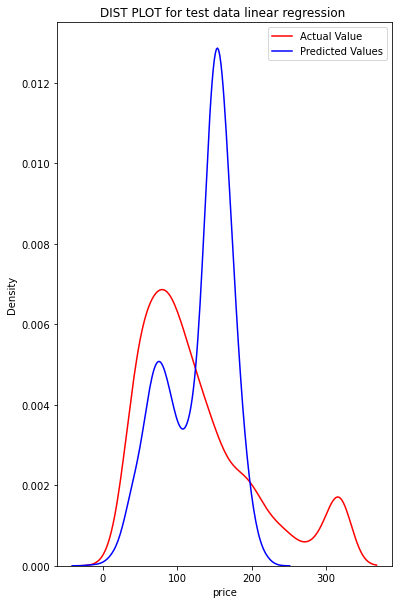

In [85]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(test_output, hist=False, color="r", label="Actual Value")
sns.distplot(output_ln, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('DIST PLOT for test data linear regression ')
plt.legend()
plt.show()



In [86]:
knn = KNeighborsRegressor()
knn.fit(train_input,train_output)
outputknn=knn.predict(test_input)
rmse_knn = mean_squared_error(test_output,outputknn,squared=False)
rmse_knn


69.24945965215932

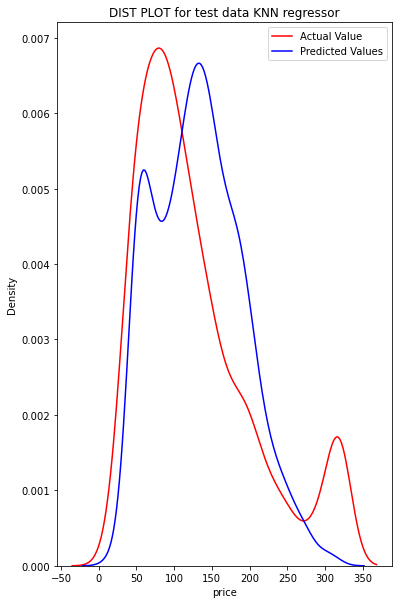

In [87]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(test_output, hist=False, color="r", label="Actual Value")
sns.distplot(outputknn, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('DIST PLOT for test data KNN regressor')
plt.legend()
plt.show()


In [88]:
DT = DecisionTreeRegressor()
DT.fit(train_input,train_output)
outputDT=DT.predict(test_input)
outputDT_train=DT.predict(train_input)


rmse_DT = mean_squared_error(test_output,outputDT,squared=False)
rmse_DT

83.58628106485274

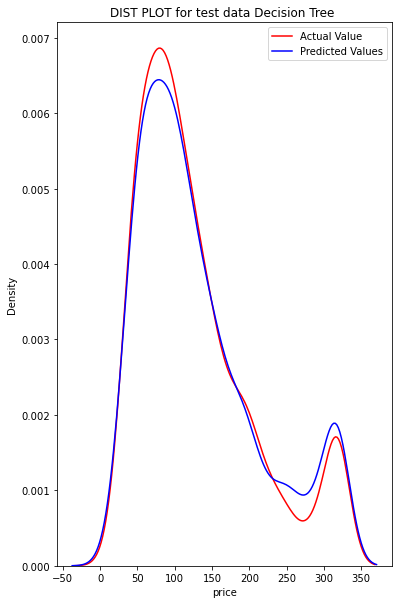

In [89]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(test_output, hist=False, color="r", label="Actual Value")
sns.distplot(outputDT, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('DIST PLOT for test data Decision Tree ')
plt.legend()
plt.show()


In [90]:
outputDT

array([ 30., 182., 125., ..., 127.,  60.,  69.])

In [91]:
RF = RandomForestRegressor()
RF.fit(train_input,train_output)
outputRF=RF.predict(test_input)
outputRF_train=RF.predict(train_input)

rmse_RF = mean_squared_error(test_output,outputRF,squared=False)
rmse_RF

61.692133022245805

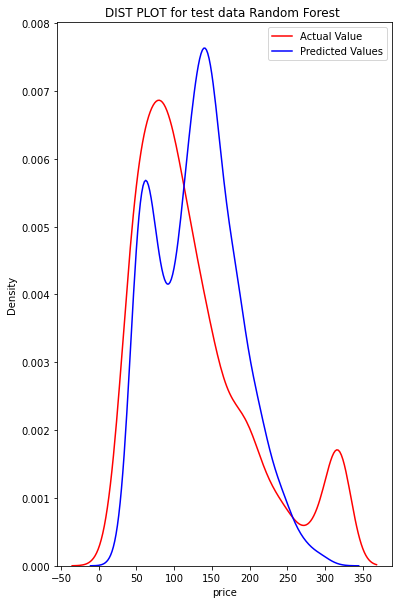

In [92]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(test_output, hist=False, color="r", label="Actual Value")
sns.distplot(outputRF, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('DIST PLOT for test data Random Forest ')
plt.legend()
plt.show()
